Dependencies

In [1]:
# https://www.data-blogger.com/2017/06/15/fraud-detection-a-simple-machine-learning-approach/
#install pandas and scikit learn versions in Jupyter notebook for this demo from
#!pip install seaborn==0.9.0
!pip install pandas==0.19.2 scikit-learn==0.18.1


#import dependencies
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import csv data into a pandas dataFrame

In [2]:
data = pd.read_csv('creditcard.csv')

Visualize the data

In [3]:
print(data)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.221637  0.383930 -1.234899 -1.48

In [4]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [5]:
data.shape

(284807, 31)

Each row in the data represents a transaction
Separate the data into two parts, X and Y, 
X data will contain all the features of the transaction
Y data will contain the label(aka class): 0 if it is NOT fraud or 1 if it is fraud

In [61]:
# Only use the 'Amount' and 'V1', ..., 'V28' features
features = ['Amount'] + ['V%d' % number for number in range(1, 29)]

# The target variable which we would like to predict, is the 'Class' variable
target = 'Class'

# Now create an X variable (containing the features) and an y variable (containing only the target variable)
X = data[features]
y = data[target]
num_of_frauds_before_filtering = 0
for value in y:
    if value == 1:
        num_of_frauds_before_filtering = num_of_frauds_before_filtering + 1
print(num_of_frauds_before_filtering)

492


In [25]:
def normalize(X):
    """
    Make the distribution of the values of each variable similar by subtracting the mean and by dividing by the standard deviation.
    """
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X

In [8]:
#Normalize after splitting data into training and testing when doing training and modeling
#Visualize data
#to maybe get rid of variables that does not matter
#or maybe get rid of transactions that are repeated too many times therefore increasing the fraud ratio in the data
#to make training data higher quality
X_data_visualize = data[features]

In [9]:
X_data_visualize.shape

(284807, 29)

In [10]:
y.shape

(284807,)

In [11]:
x_merged_to_y = pd.concat([X_data_visualize, y], axis=1)
x_merged_to_y.shape

(284807, 30)

In [12]:
print(x_merged_to_y)

        Amount         V1         V2        V3        V4        V5        V6  \
0       149.62  -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1         2.69   1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       378.66  -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       123.50  -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4        69.99  -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
5         3.67  -0.425966   0.960523  1.141109 -0.168252  0.420987 -0.029728   
6         4.99   1.229658   0.141004  0.045371  1.202613  0.191881  0.272708   
7        40.80  -0.644269   1.417964  1.074380 -0.492199  0.948934  0.428118   
8        93.20  -0.894286   0.286157 -0.113192 -0.271526  2.669599  3.721818   
9         3.68  -0.338262   1.119593  1.044367 -0.222187  0.499361 -0.246761   
10        7.80   1.449044  -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
11        9.99   0.384978   0.616109 -0.

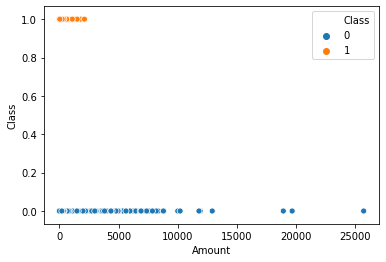

In [13]:
ax = sns.scatterplot(x="Amount",y="Class",hue="Class",data=x_merged_to_y)

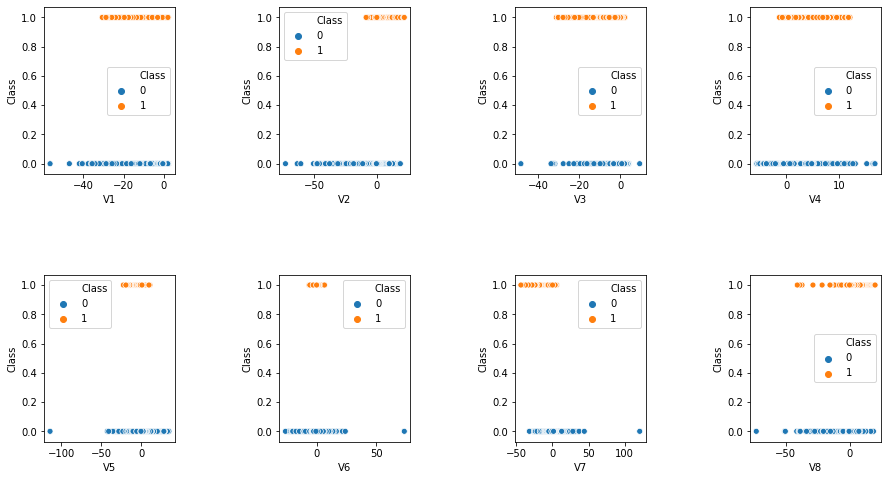

In [15]:
fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0.6, wspace=0.8)
for i in range(1, 9):
    plt.subplot(2, 4, i)
    sns.scatterplot(x="V"+str(i),y="Class",hue="Class",data=x_merged_to_y)

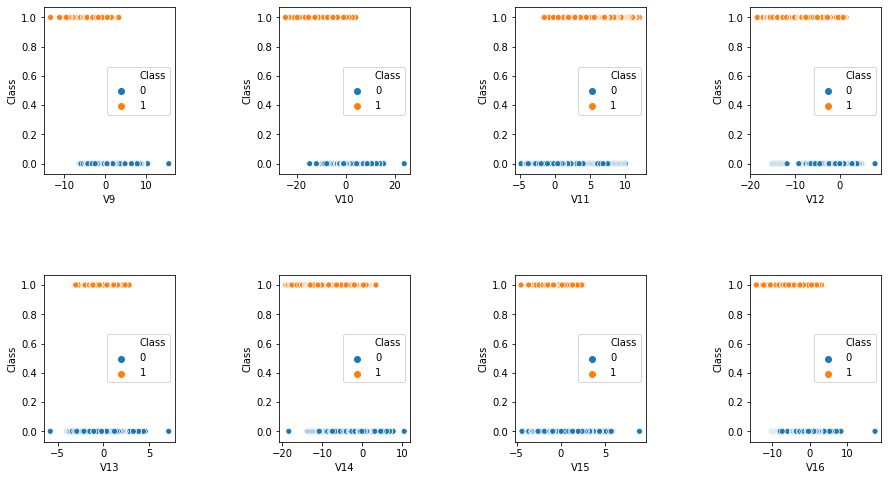

In [16]:
fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0.6, wspace=0.8)
for i in range(1, 9):
    plt.subplot(2, 4, i)
    sns.scatterplot(x="V"+str(i+8),y="Class",hue="Class",data=x_merged_to_y)

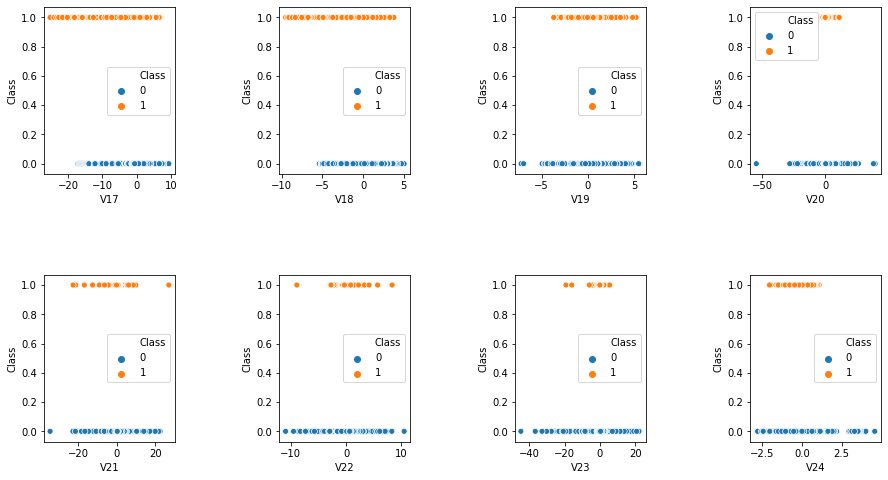

In [17]:
fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0.6, wspace=0.8)
for i in range(1, 9):
    plt.subplot(2, 4, i)
    sns.scatterplot(x="V"+str(i+16),y="Class",hue="Class",data=x_merged_to_y)

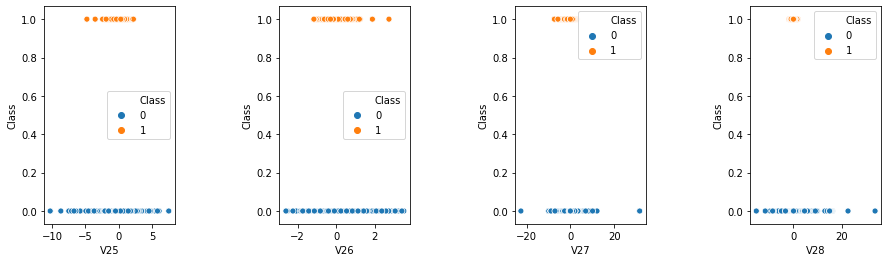

In [18]:
fig = plt.figure(figsize=(15,4))
fig.subplots_adjust(hspace=0.6, wspace=0.8)
for i in range(1, 5):
    plt.subplot(1, 4, i)
    sns.scatterplot(x="V"+str(i+24),y="Class",hue="Class",data=x_merged_to_y)

In [62]:
#After visualizing the data, 
#I notice that V20 and V28 have few instances of fraud, so I removed those two variables, but it did not improve the accuracy
#remove V20 and V28
#X = X.drop(['V20', 'V28'], axis=1)

#After visualizing the data,
#remove rows that contain a value greater than 2.5 in the V24 column, because there are no frauds above 2.5 value
#And
#remove rows that contain a value greater than 20 in the Amount column, because there are no frauds above 20
#remove rows that contain a value greater than 5k in the Amount column, because there are no frauds above 5k

list_of_index = []
for index, row in X.iterrows():
    #if row['Amount'] > 20: #this filter gave me 94% accuracy with 29 columns, but that got rid of alot of fraud cases in the data set...
    if row['Amount'] > 3000 or row['V2'] < -25: 
        list_of_index.append(index)
# print(list_of_index)
# for index in list_of_index:
#     print(X['Amount'][index])
X = X.drop(list_of_index)
y = y.drop(list_of_index)

In [63]:
print(X.shape)
print(y.shape)
num_of_frauds_after_filtering = 0
for value in y:
    if value == 1:
        num_of_frauds_after_filtering = num_of_frauds_after_filtering + 1
if num_of_frauds_before_filtering == num_of_frauds_after_filtering:
    print("I didn't remove any cases of fraud within the data, only removed cases of non fraud")
print(num_of_frauds_after_filtering)

(284474, 29)
(284474,)
I didn't remove any cases of fraud within the data, only removed cases of non fraud
492


In [64]:
# Define the model
model = LogisticRegression()

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X, y):
    # Select the train and test data
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
    
    # Normalize the data
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    
    # Fit and predict!
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))

/Users/angelsanchez/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/angelsanchez/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


             precision    recall  f1-score   support

          0       1.00      1.00      1.00    141991
          1       0.89      0.60      0.72       246

avg / total       1.00      1.00      1.00    142237

